First task is described here: https://colab.research.google.com/drive/1Bw5e-vMOkMScuA397O9zslNz8rhELGjq?usp=sharing

Part of code to get all pages from "https://itmo.ru/ru/personlist/"

In [56]:
from bs4 import BeautifulSoup as bs
import requests
import sys

url = "https://itmo.ru/ru/personlist/"

all_articles = []
left = 192
right = 225

for i in range(left, right):
    
    additional_url = str(i) + "/letter_" + str(i) + ".htm"
    page = bs(requests.get(url + additional_url).text,"html.parser")
    
    articles = page.findAll("a", {"class": "contact-pad"})
    all_articles += articles
    
    sys.stdout.write("\rLoading data from ITMO website: " + str(int((i - 191)/(right - left) * 100)) + "%") 
    sys.stdout.flush()
    

all_articles = set(all_articles)
print("\nAmount of articles:" + str(len(all_articles)))



Loading data from ITMO website: 100%
Amount of articles:900


Class for keeping all the usefull employee information

In [41]:
class Employee():
    
    def __init__(self, name, pub, jobs_list, degree_list):
        self.name = name
        self.publications = pub
        self.jobs = jobs_list
        self.degree = degree_list
    def __str__(self):
        return f"\nName: {self.name} \nJobs:{self.jobs} \nDegree:{self.degree} \nPublications amount:{self.publications}"        

Part of code where we take data from personal page of each employee

In [42]:
import re
all_persons_data = []
cnt = 1

for article in all_articles:
    per_page = bs(requests.get("https://itmo.ru" + article['href']).text, 'html.parser')
    
    name = per_page.find("h1", {"class" : "page-header"}).find("span").text
    person_info = per_page.find("div", {"class" : "c-personCard-details"})
    publications = per_page.find("ul", {"class": "nav nav-tabs"}) 
    
    try:
        publications = int(publications.find("span", {"class":"badge"}).text)
    except AttributeError :
        publications = 0
    
    degree, jobs = person_info.findAll("dl")
    
    try:
        degree = degree.find("dd").text
    except AttributeError:
        degree = ""
    
    raw_jobs = str(jobs.find("dd"))
    raw_jobs = re.sub("\<.?[ad]+[ 0-9a-z\"\=\/\_\.\-]*\>","",raw_jobs)
    jobs = raw_jobs.strip().split("<br/>")[:-1]
    
    emp = Employee(name, publications, jobs, degree)
    all_persons_data.append(emp)
    
    cnt += 1
    
    sys.stdout.write("\rLoading data from each ITMO employee: " + str(int(cnt / len(all_articles) * 100)) + "%") 
    sys.stdout.flush()

Loading data from each ITMO employee: 100%

Answering the first 4 questions of lab

In [53]:
names_with_max = []
two_jobs_or_more = []
degree_set = set()

max_jobs = 0
degree_counter = 0

print("Amount of people with 2 or more jobs:")
for employee in all_persons_data:
    
    if len(employee.jobs) >= 2:
        two_jobs_or_more.append(employee.name)
        
    if len(employee.jobs) > max_jobs:
        max_jobs = len(employee.jobs)
        names_with_max = []
        
    if len(employee.jobs) == max_jobs:
        names_with_max.append(employee.name)
        
    if len(employee.degree) != 0:
        degree_counter += 1
        
    for degree in employee.degree.lower().split(","):
        degree_set.add(degree.strip())
        
degree_set.remove("")
print(len(two_jobs_or_more))

print(f"People with max jobs:\n{name_with_max}\njob streak - {max_jobs}")
print(f"People with academic degree:\n{degree_counter}")
print(f"All available academic degrees:\n{degree_set}")

People with 2 or more jobs:
378
People with max jobs:
['Ковалев Антон Владимирович', 'Сантьев Алексей Альбертович', 'Бухановский Александр Валерьевич', 'Егоров Владимир Ильич', 'Луценко Анна Евгеньевна', 'Андреев Юрий Сергеевич', 'Ульянцев Владимир Игоревич']
job streak - 5
People with academic degree:
438
All available academic degrees:
{'кандидат социологических наук', 'доктор физико-математических наук', 'кандидат географических наук', 'кандидат физико-математических наук', 'медико-биологические науки', 'кандидат философских наук', 'кандидат культурологии', 'технические науки', 'кандидат психологических наук', 'кандидат архитектуры', 'философские науки', 'старший научный сотрудник', 'phd', 'кандидат филологических наук', 'кандидат педагогических наук', 'кандидат медицинских наук', 'доцент', 'кандидат экономических наук', 'доктор технических наук', 'физико-математические науки', 'кандидат химических наук', 'доктор химических наук', 'профессор', 'кандидат технических наук', 'кандидат 

The 5th question

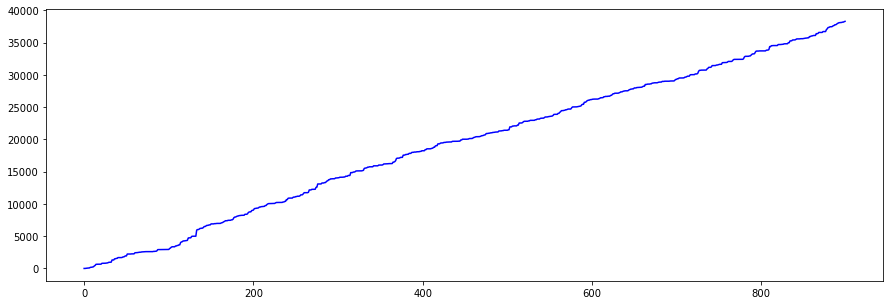

In [44]:
import matplotlib.pyplot as plt
import random

x = range(len(all_persons_data))
y = []
current_publications = 0

for employee in all_persons_data:
    
    current_publications += employee.publications
    y.append(current_publications)
    
plt.rcParams["figure.figsize"] = 15,7
plt.plot(x, y, "b")
plt.show()

THe 6th question

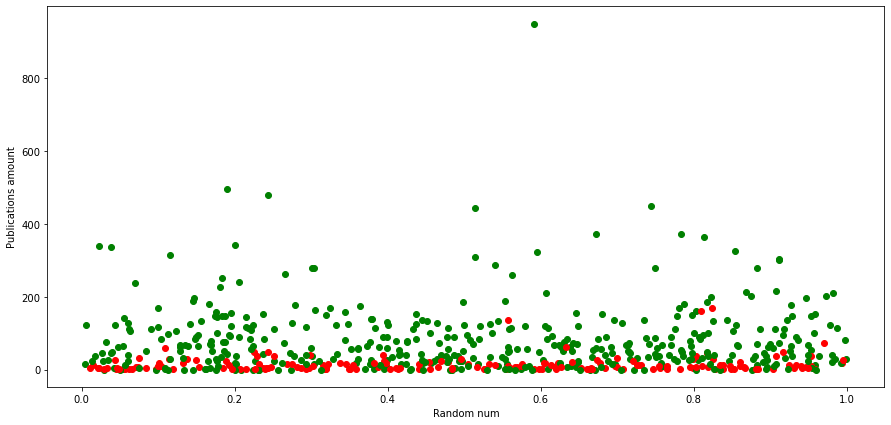

In [55]:
for employee in all_persons_data:
    
    if employee.degree != "":
        plt.scatter(random.random(), employee.publications, c = "g")
        
    elif employee.publications != 0:
        plt.scatter(random.random(), employee.publications, c = "r")
        
plt.xlabel("Random num")
plt.ylabel("Publications amount")
plt.show()